# Import lib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import stats
import matplotlib.image as mpimg

In [ ]:
# Read image
img = cv2.imread('32.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

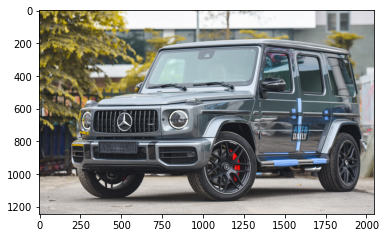

In [ ]:
# Show image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

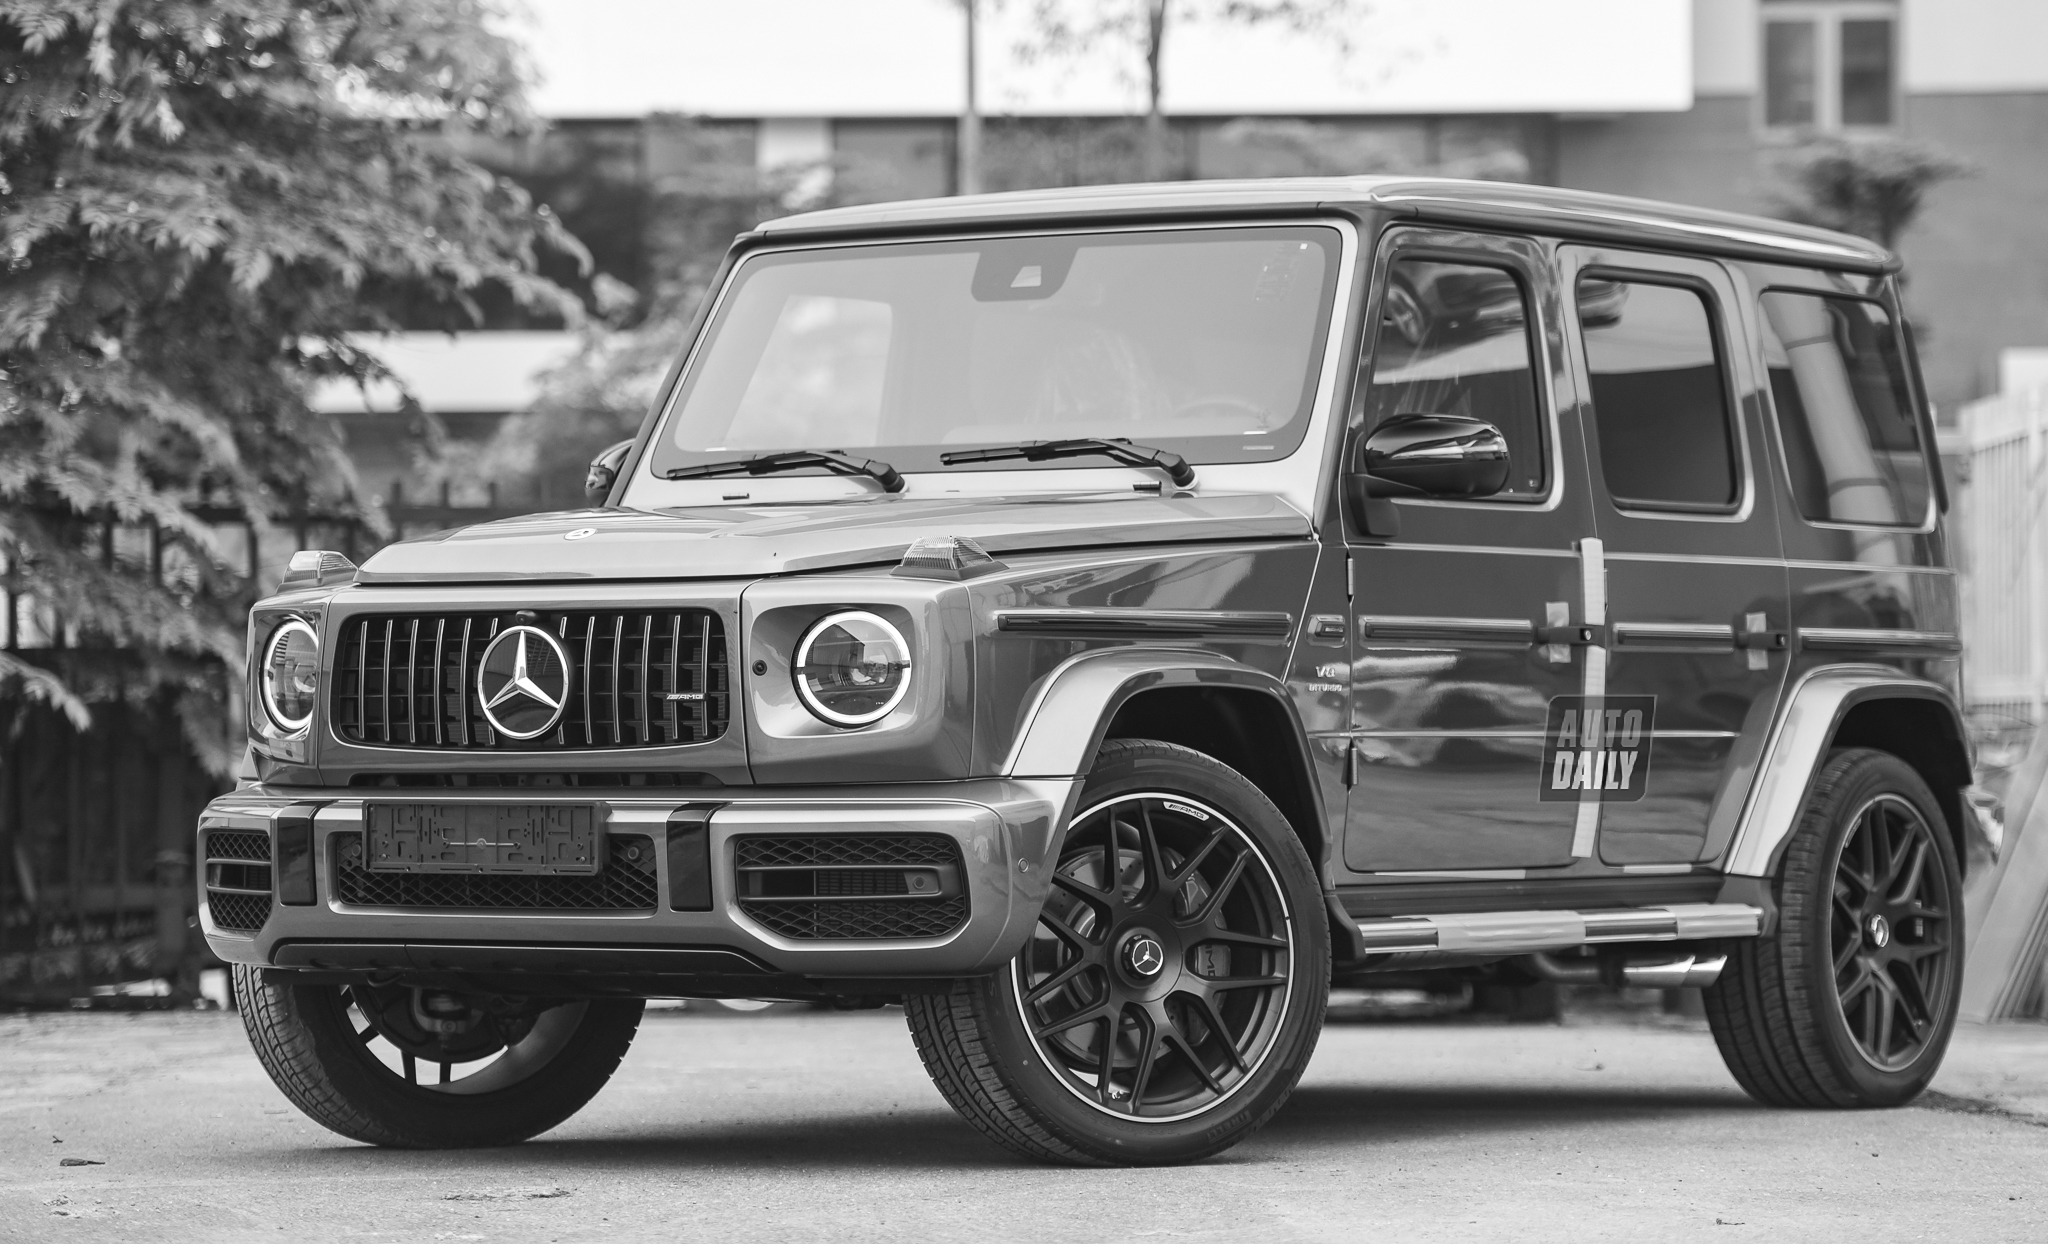

In [ ]:
# Grayscale
cv2_imshow(gray)

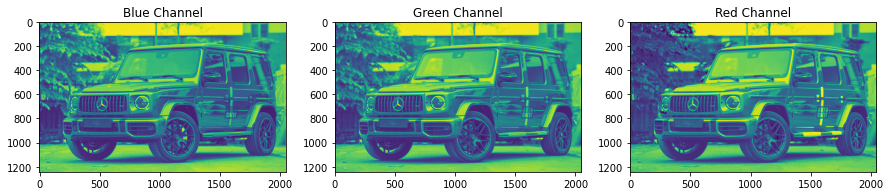

In [ ]:
#Splitting into channels
blue,green,red = cv2.split(img)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [ ]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [ ]:
pca_b = PCA(n_components=1000)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=1000)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=1000)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [ ]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(1244, 1000)
(1244, 1000)
(1244, 1000)


In [ ]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9999406288896091
Green Channel: 0.9999521682499882
Red Channel  : 0.9999266228260075


In [ ]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(1244, 2048) (1244, 2048) (1244, 2048)


In [ ]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(1244, 2048, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


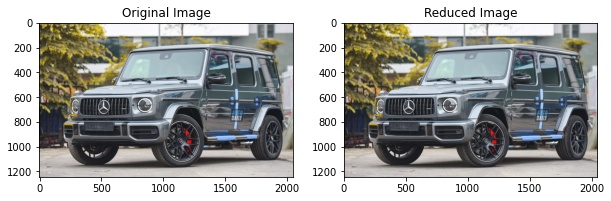

In [ ]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()